# Notebook to select glacier segment features

In [3]:
#initilize:
import numpy as np
import matplotlib.pyplot as plt
from oggm import cfg, utils, workflow, graphics, tasks
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import os
cfg.initialize(logging_level='WORKFLOW')

/srv/conda/envs/notebook/lib/python3.8/site-packages/oggm/cfg.py:379: FutureWarning: In future versions of OGGM, the logging config WORKFLOW will no longer print ERROR or WARNING messages, but only high level information (i.e. hiding potential errors in your code but also avoiding cluttered log files for runs with many expected errors, e.g. global runs). If you want to obtain a similar logger behavior as before, set `logging_level='WARNING'`, which will print high level info as well as errors and warnings during the run. If you want to use the new behavior and suppress this warning, set `logging_level='WORKFLOW'` and `future=True`.
  warnings.warn(msg, category=FutureWarning)
2021-02-15 20:37:50: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2021-02-15 20:37:50: oggm.cfg: Multiprocessing switched OFF according to the ENV variable OGGM_USE_MULTIPROCESSING
2021-02-15 20:37:50: oggm.cfg: Multiprocessing: using slurm allocated processors (N=1)


In [5]:
fr = utils.get_rgi_region_file(11, version='62')  # Central Europe
gdf = gpd.read_file(fr)
gdf.head()

,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,...,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Name,check_geom,geometry
0,RGI60-11.00001,G013599E47495N,20030799,20030999,13.5987,47.4949,11,1,0.122,2191,...,461,0,0,0,0,9,9,None,None,"POLYGON ((13.60035 47.49330, 13.59995 47.49332..."
1,RGI60-11.00002,G013614E47485N,20030799,20030999,13.6135,47.4845,11,1,2.292,2203,...,1853,0,0,0,0,9,9,None,None,"POLYGON ((13.60638 47.47578, 13.60599 47.47579..."
2,RGI60-11.00003,G013596E47484N,20030799,20030999,13.5960,47.4835,11,1,0.851,2280,...,1140,0,0,0,0,9,9,None,None,"POLYGON ((13.59765 47.47613, 13.59726 47.47614..."
3,RGI60-11.00004,G013583E47481N,20030799,20030999,13.5829,47.4807,11,1,0.053,2319,...,382,0,0,0,0,9,9,None,None,"POLYGON ((13.58283 47.47969, 13.58243 47.47971..."
4,RGI60-11.00005,G013603E47477N,20030799,20030999,13.6026,47.4774,11,1,0.057,2656,...,202,0,0,0,0,9,9,None,None,"POLYGON ((13.60076 47.47519, 13.60036 47.47521..."


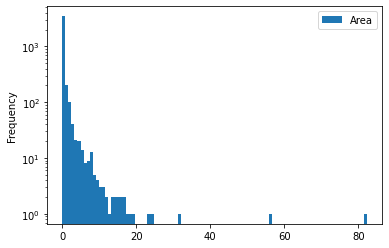

In [6]:
gdf[['Area']].plot(kind='hist', bins=100, logy=True);

In [8]:
gdf_by_area = gdf.loc[gdf.Area > 15]
print(gdf_by_area)

               RGIId         GLIMSId   BgnDate   EndDate    CenLon   CenLat  \
105   RGI60-11.00106  G012697E47099N  20030799  20030999  12.69670  47.0991   
745   RGI60-11.00746  G010757E46849N  20030799  20030999  10.75700  46.8489   
1237  RGI60-11.01238  G008397E46624N  20030799  20030999   8.39650  46.6236   
1327  RGI60-11.01328  G008219E46564N  20030799  20030999   8.21930  46.5642   
1345  RGI60-11.01346  G008067E46568N  20030799  20030999   8.06736  46.5676   
1449  RGI60-11.01450  G008019E46503N  20030799  20030999   8.01919  46.5028   
1477  RGI60-11.01478  G008121E46517N  20030799  20030999   8.12141  46.5169   
1826  RGI60-11.01827  G007977E46417N  20030799  20030999   7.97735  46.4173   
1945  RGI60-11.01946  G009925E46389N  20030799  20030999   9.92523  46.3891   
2738  RGI60-11.02739  G007639E45977N  20030799  20030999   7.63920  45.9773   
2765  RGI60-11.02766  G007291E45965N  20030799  20030999   7.29108  45.9647   
2821  RGI60-11.02822  G007803E45950N  20030799  2003

In [10]:
# define working dir:
cfg.PATHS['working_dir'] = utils.gettempdir(dirname='segment_feature_selection', reset=True)
print("working directory:",cfg.PATHS['working_dir'])

# Define the glacier for the run:
rgi_ids = gdf_by_area.RGIId
print(rgi_ids)

# Initilize glacier directories:
gdirs = workflow.init_glacier_directories(rgi_ids, from_prepro_level=2, prepro_border=10)

working directory: /tmp/OGGM/segment_feature_selection
105     RGI60-11.00106
745     RGI60-11.00746
1237    RGI60-11.01238
1327    RGI60-11.01328
1345    RGI60-11.01346
1449    RGI60-11.01450
1477    RGI60-11.01478
1826    RGI60-11.01827
1945    RGI60-11.01946
2738    RGI60-11.02739
2765    RGI60-11.02766
2821    RGI60-11.02822
3642    RGI60-11.03643
Name: RGIId, dtype: object


2021-02-15 20:42:59: oggm.workflow: init_glacier_directories from prepro level 2 on 13 glaciers.
2021-02-15 20:42:59: oggm.workflow: Execute entity task gdir_from_prepro on 13 glaciers
100% of  30.9 MiB |######################| Elapsed Time: 0:00:03 Time:  0:00:03
100% of  29.2 MiB |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% of  31.3 MiB |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% of  28.6 MiB |######################| Elapsed Time: 0:00:01 Time:  0:00:01


In [12]:
# Tasks needed before inversion:
list_tasks = [tasks.glacier_masks, # needed for the following tasks, makes geometries.pkl and gridded_data.nc
              tasks.compute_centerlines,
              tasks.initialize_flowlines,
              tasks.compute_downstream_line,
]
for task in list_tasks:
    # The order matters!
    workflow.execute_entity_task(task, gdirs)

# More tasks needed:
list_flowline_tasks = [
         tasks.catchment_area,
         tasks.catchment_width_geom,
         tasks.catchment_width_correction
         ]

list_flowline_tasks_2 = [
         tasks.compute_downstream_bedshape
         ]

for task in list_flowline_tasks:
    workflow.execute_entity_task(task, gdirs)


def try_tasks(glac_directory, task_list, n=-1, f=0):
    n+=1
    f=0
    
    while n +1 <= len(glac_directory):
        
        try:
            workflow.execute_entity_task(task_list, glac_directory[n])
            print(glac_directory[n].rgi_id, "passed task")
            n+=1
        
        except AssertionError:
            f+=1
            print("AssertionError")
            glac_directory.remove(glac_directory[n])
            if glac_directory[n] not in glac_directory: 
                print(glac_directory[n].rgi_id , "is removed from directory")
                
            if n < len(glac_directory): try_tasks(glac_directory, task_list, n=n, f=f)
    
    if n == len(glac_directory): print("Finished, number of glaciers: {}, number of fails: {}".format(n,f))

try_tasks(gdirs, list_flowline_tasks_2[0])

2021-02-15 20:43:44: oggm.workflow: Execute entity task glacier_masks on 13 glaciers
2021-02-15 20:43:51: oggm.workflow: Execute entity task compute_centerlines on 13 glaciers
2021-02-15 20:43:53: oggm.workflow: Execute entity task initialize_flowlines on 13 glaciers
2021-02-15 20:43:54: oggm.workflow: Execute entity task compute_downstream_line on 13 glaciers
2021-02-15 20:43:54: oggm.workflow: Execute entity task catchment_area on 13 glaciers
2021-02-15 20:44:32: oggm.workflow: Execute entity task catchment_width_geom on 13 glaciers
2021-02-15 20:45:05: oggm.workflow: Execute entity task catchment_width_correction on 13 glaciers
2021-02-15 20:45:09: oggm.workflow: Execute entity task compute_downstream_bedshape on 1 glaciers
2021-02-15 20:45:09: oggm.core.centerlines: AssertionError occurred during task compute_downstream_bedshape on RGI60-11.00106: len(hgts) >= 5
2021-02-15 20:45:09: oggm.workflow: Execute entity task compute_downstream_bedshape on 1 glaciers
2021-02-15 20:45:09: og

AssertionError
AssertionError
RGI60-11.01346 passed task
RGI60-11.01450 passed task


2021-02-15 20:45:09: oggm.workflow: Execute entity task compute_downstream_bedshape on 1 glaciers
2021-02-15 20:45:09: oggm.workflow: Execute entity task compute_downstream_bedshape on 1 glaciers
2021-02-15 20:45:09: oggm.workflow: Execute entity task compute_downstream_bedshape on 1 glaciers
2021-02-15 20:45:09: oggm.workflow: Execute entity task compute_downstream_bedshape on 1 glaciers


RGI60-11.01478 passed task
RGI60-11.01827 passed task
RGI60-11.01946 passed task
RGI60-11.02739 passed task


2021-02-15 20:45:09: oggm.workflow: Execute entity task compute_downstream_bedshape on 1 glaciers
2021-02-15 20:45:09: oggm.workflow: Execute entity task compute_downstream_bedshape on 1 glaciers
2021-02-15 20:45:09: oggm.workflow: Execute entity task compute_downstream_bedshape on 1 glaciers
2021-02-15 20:45:09: oggm.core.centerlines: AssertionError occurred during task compute_downstream_bedshape on RGI60-11.01328: len(hgts) >= 5
2021-02-15 20:45:09: oggm.workflow: Execute entity task compute_downstream_bedshape on 1 glaciers
2021-02-15 20:45:09: oggm.workflow: Execute entity task compute_downstream_bedshape on 1 glaciers


RGI60-11.02766 passed task
RGI60-11.02822 passed task
RGI60-11.03643 passed task
Finished, number of glaciers: 11, number of fails: 0
AssertionError
RGI60-11.01450 passed task


2021-02-15 20:45:09: oggm.workflow: Execute entity task compute_downstream_bedshape on 1 glaciers
2021-02-15 20:45:09: oggm.workflow: Execute entity task compute_downstream_bedshape on 1 glaciers
2021-02-15 20:45:10: oggm.workflow: Execute entity task compute_downstream_bedshape on 1 glaciers
2021-02-15 20:45:10: oggm.workflow: Execute entity task compute_downstream_bedshape on 1 glaciers


RGI60-11.01478 passed task
RGI60-11.01827 passed task
RGI60-11.01946 passed task
RGI60-11.02739 passed task


2021-02-15 20:45:10: oggm.workflow: Execute entity task compute_downstream_bedshape on 1 glaciers
2021-02-15 20:45:10: oggm.workflow: Execute entity task compute_downstream_bedshape on 1 glaciers
2021-02-15 20:45:10: oggm.workflow: Execute entity task compute_downstream_bedshape on 1 glaciers
2021-02-15 20:45:10: oggm.workflow: Execute entity task compute_downstream_bedshape on 1 glaciers


RGI60-11.02766 passed task
RGI60-11.02822 passed task
RGI60-11.03643 passed task
Finished, number of glaciers: 10, number of fails: 0
RGI60-11.01346 passed task


2021-02-15 20:45:10: oggm.workflow: Execute entity task compute_downstream_bedshape on 1 glaciers
2021-02-15 20:45:10: oggm.workflow: Execute entity task compute_downstream_bedshape on 1 glaciers
2021-02-15 20:45:10: oggm.workflow: Execute entity task compute_downstream_bedshape on 1 glaciers
2021-02-15 20:45:10: oggm.workflow: Execute entity task compute_downstream_bedshape on 1 glaciers


RGI60-11.01450 passed task
RGI60-11.01478 passed task
RGI60-11.01827 passed task
RGI60-11.01946 passed task


2021-02-15 20:45:10: oggm.workflow: Execute entity task compute_downstream_bedshape on 1 glaciers
2021-02-15 20:45:10: oggm.workflow: Execute entity task compute_downstream_bedshape on 1 glaciers
2021-02-15 20:45:10: oggm.workflow: Execute entity task compute_downstream_bedshape on 1 glaciers
2021-02-15 20:45:10: oggm.workflow: Execute entity task compute_downstream_bedshape on 1 glaciers


RGI60-11.02739 passed task
RGI60-11.02766 passed task
RGI60-11.02822 passed task
RGI60-11.03643 passed task
Finished, number of glaciers: 10, number of fails: 2


2021-02-15 20:45:10: oggm.workflow: Execute entity task compute_downstream_bedshape on 1 glaciers
2021-02-15 20:45:10: oggm.workflow: Execute entity task compute_downstream_bedshape on 1 glaciers
2021-02-15 20:45:10: oggm.workflow: Execute entity task compute_downstream_bedshape on 1 glaciers
2021-02-15 20:45:10: oggm.workflow: Execute entity task compute_downstream_bedshape on 1 glaciers
2021-02-15 20:45:11: oggm.workflow: Execute entity task compute_downstream_bedshape on 1 glaciers


RGI60-11.00746 passed task
RGI60-11.01346 passed task
RGI60-11.01450 passed task
RGI60-11.01478 passed task
RGI60-11.01827 passed task


2021-02-15 20:45:11: oggm.workflow: Execute entity task compute_downstream_bedshape on 1 glaciers
2021-02-15 20:45:11: oggm.workflow: Execute entity task compute_downstream_bedshape on 1 glaciers
2021-02-15 20:45:11: oggm.workflow: Execute entity task compute_downstream_bedshape on 1 glaciers
2021-02-15 20:45:11: oggm.workflow: Execute entity task compute_downstream_bedshape on 1 glaciers


RGI60-11.01946 passed task
RGI60-11.02739 passed task
RGI60-11.02766 passed task
RGI60-11.02822 passed task
RGI60-11.03643 passed task
Finished, number of glaciers: 10, number of fails: 1


In [15]:
import xarray as xr

In [16]:
import logging
# Module logger
log = logging.getLogger(__name__)

import geopandas as gpd
import numpy as np
from skimage import measure
from shapely.ops import transform
import shapely.geometry as shpg
from scipy.ndimage.measurements import label, find_objects

from shapely.geometry import mapping, Polygon
import fiona

def mask_to_polygon(mask, gdir=None):
    """Converts a mask to a single polygon.

    The mask should be a single entity with nunataks: I didnt test for more
    than one "blob".

    Parameters
    ----------
    mask: 2d array with ones and zeros
        the mask to convert
    gdir: GlacierDirectory
        for logging

    Returns
    -------
    (poly, poly_no_nunataks) Shapely polygons
    """

    regions, nregions = label(mask, structure=LABEL_STRUCT)
    if nregions > 1:
        rid = ''
        if gdir is not None:
            rid = gdir.rgi_id
        log.debug('(%s) we had to cut a blob from the catchment', rid)
        
        # Check the size of those
        region_sizes = [np.sum(regions == r) for r in np.arange(1, nregions+1)]
        am = np.argmax(region_sizes)
        
        # Check not a strange glacier
        sr = region_sizes.pop(am)
        for ss in region_sizes:
            if (ss / sr) > 0.2:
                log.warning('(%s) this blob was unusually large', rid)
        mask[:] = 0
        mask[np.where(regions == (am+1))] = 1
    
    nlist = measure.find_contours(mask, 0.5)
        
    nlist_new = np.zeros_like(nlist)
    for ND in range(0,len(nlist)):
        newNDarray = gdir.grid.ij_to_crs(nlist[ND][:,1], nlist[ND][:,0], crs='EPSG:4326')
        nlist_new[ND] = np.flip(np.transpose(newNDarray),axis=-1)
    nlist = nlist_new
    
    # First is the exterior, the rest are nunataks
    e_line = shpg.LinearRing(nlist[0][:, ::-1])
    i_lines = [shpg.LinearRing(ipoly[:, ::-1]) for ipoly in nlist[1:]]
    
    poly = shpg.Polygon(e_line, i_lines).buffer(0)
    if not poly.is_valid:
        raise GeometryError('Mask to polygon conversion error.')
    poly_no = shpg.Polygon(e_line).buffer(0)
    if not poly_no.is_valid:
        raise GeometryError('Mask to polygon conversion error.')
    return poly, poly_no

LABEL_STRUCT = np.array([[0, 1, 0],
                         [1, 1, 1],
                         [0, 1, 0]])
def flip(x, y):
    """Flips the x and y coordinate values"""
    return x, -y

In [17]:
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt


class ComputeCurvature:
    def __init__(self):
        """ Initialize some variables """
        self.xc = 0  # X-coordinate of circle center
        self.yc = 0  # Y-coordinate of circle center
        self.r = 0   # Radius of the circle
        self.xx = np.array([])  # Data points
        self.yy = np.array([])  # Data points

    def calc_r(self, xc, yc):
        """ calculate the distance of each 2D points from the center (xc, yc) """
        return np.sqrt((self.xx-xc)**2 + (self.yy-yc)**2)

    def f(self, c):
        """ calculate the algebraic distance between the data points and the mean circle centered at c=(xc, yc) """
        ri = self.calc_r(*c)
        return ri - ri.mean()

    def df(self, c):
        """ Jacobian of f_2b
        The axis corresponding to derivatives must be coherent with the col_deriv option of leastsq"""
        xc, yc = c
        df_dc = np.empty((len(c), self.xx.size))

        ri = self.calc_r(xc, yc)
        df_dc[0] = (xc - self.xx)/ri                   # dR/dxc
        df_dc[1] = (yc - self.yy)/ri                   # dR/dyc
        df_dc = df_dc - df_dc.mean(axis=1)[:, np.newaxis]
        return df_dc

    def fit(self, xx, yy):
        self.xx = xx
        self.yy = yy
        center_estimate = np.r_[np.mean(xx), np.mean(yy)]
        center = optimize.leastsq(self.f, center_estimate, Dfun=self.df, col_deriv=True)[0]

        self.xc, self.yc = center
        ri = self.calc_r(*center)
        self.r = ri.mean()

        return 1 / self.r  # Return the curvature
comp_curv = ComputeCurvature()

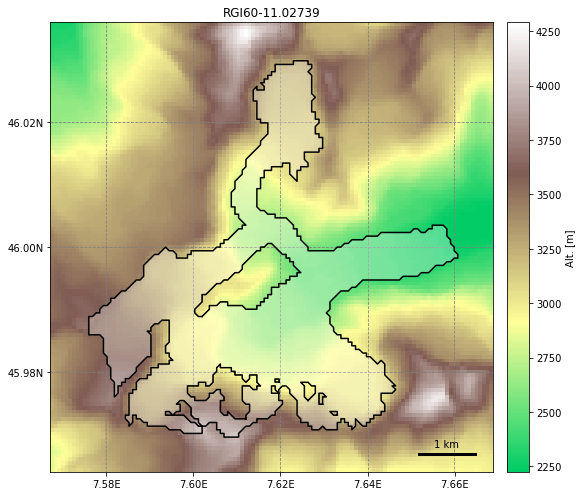

In [21]:
graphics.plot_domain(gdirs[6], figsize=(8, 7))

In [22]:
def CreatGlacierCatchments(glacier_dir, inflow=False):
    gdfc = gpd.GeoDataFrame()
    
    for i in range(0, len(glacier_dir)):
        geom = glacier_dir[i].read_pickle('geometries')
        geom_shp = transform(flip, geom['polygon_hr'])
        flowline = glacier_dir[i].read_pickle('inversion_flowlines') #Centerline object
        
        dx = abs(glacier_dir[i].grid.dx) # m
        dy = abs(glacier_dir[i].grid.dy) # m
        
        
        rgi_id = glacier_dir[i].rgi_id
        
        catchment_indices = geom['catchment_indices']
        
        with xr.open_dataset(glacier_dir[i].get_filepath('gridded_data')) as ds:
                topo = ds.topo
                # Glacier outline raster
                mask_outline = ds.glacier_ext
                
        mask = np.zeros((glacier_dir[i].grid.ny, glacier_dir[i].grid.nx))

        for j, ci in enumerate(catchment_indices):
            """
            j = flow line/catchment (the same) index
            ci = catchment coordinates (?)
            """
            # Catchment polygon
            mask[:] = 0
            mask[tuple(ci.T)] = 1
            
            topo_ext = topo.where(mask==1)
            seg_mean = int(topo_ext.mean())
            seg_extent = int(topo_ext.max() - topo_ext.min())
            
            polygon, poly_no = mask_to_polygon(mask, gdir=gdirs[i])
                        
            #Geometry:
            gdfc.loc[rgi_id + str(j), 'geometry'] = poly_no
            
            #Add RGI number
            gdfc.loc[rgi_id + str(j), 'RGI'] = str(rgi_id)
            
            #Catchment index:
            print("catchment:", rgi_id + str(j), "added")
            gdfc.loc[rgi_id + str(j), 'catchment'] = int(j)
            
            #Area:
            area_km = poly_no.area * dx/1000 * dy/1000 # km^2
            gdfc.loc[rgi_id + str(j), 'area'] = area_km
            
            #Mean:
            gdfc.loc[rgi_id + str(j), 'mean_alt'] = seg_mean
            
            #Extent:
            gdfc.loc[rgi_id + str(j), 'alt_diff'] = seg_extent
            
            #Number of segments in catchment:
            seg_no = len(flowline[j].widths)
            gdfc.loc[rgi_id + str(j), 'segments'] = seg_no
            
            if inflow:
                #In flow indices (flowline[j][In flow indices] = segments that have inflow from other catchment)
                inflow_indices = flowline[j].inflow_indices
                gdfc.loc[rgi_id + str(j), 'inflow indices (list)'] = str(inflow_indices)
            
            #flows to index
            #flows_to_index = flowline[j].flows_to_indice
            #gdfc.loc[rgi_id + str(j), 'flows to indices'] = flows_to_index
    gdfc.set_crs("EPSG:4326")  
    return gdfc

In [23]:
def CreatOutlineCatchments(glacier_dir, inflow=False):
    gdfc = gpd.GeoDataFrame()
    
    for i in range(0, len(glacier_dir)):
        geom = glacier_dir[i].read_pickle('geometries')
        geom_shp = transform(flip, geom['polygon_hr'])
        flowline = glacier_dir[i].read_pickle('inversion_flowlines') #Centerline object
        
        catchment_indices = geom['catchment_indices']
        
        mask = np.zeros((glacier_dir[i].grid.ny, glacier_dir[i].grid.nx))

        for j, ci in enumerate(catchment_indices):
            """
            j = flow line/catchment (the same) index
            ci = catchment coordinates (?)
            """
            # Catchment polygon
            mask[:] = 0
            mask[tuple(ci.T)] = 1
            print(tuple(ci))
            #polygon, poly_no = mask_to_polygon(mask, gdir=gdirs[i])
                        
            #Geometry:
            #gdfc.loc[rgi_id + str(j), 'geometry'] = poly_no
            
    return gdfc

In [24]:
gdfcz = CreatGlacierCatchments(gdirs)
gdfcz.head()

catchment: RGI60-11.007460 added
catchment: RGI60-11.007461 added
catchment: RGI60-11.007462 added
catchment: RGI60-11.007463 added
catchment: RGI60-11.007464 added
catchment: RGI60-11.007465 added


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


catchment: RGI60-11.013460 added
catchment: RGI60-11.013461 added
catchment: RGI60-11.013462 added
catchment: RGI60-11.013463 added
catchment: RGI60-11.013464 added


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


catchment: RGI60-11.013465 added
catchment: RGI60-11.014500 added
catchment: RGI60-11.014501 added


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


catchment: RGI60-11.014502 added
catchment: RGI60-11.014503 added
catchment: RGI60-11.014504 added


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


catchment: RGI60-11.014505 added
catchment: RGI60-11.014780 added
catchment: RGI60-11.014781 added
catchment: RGI60-11.014782 added


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


catchment: RGI60-11.014783 added
catchment: RGI60-11.014784 added
catchment: RGI60-11.014785 added


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


catchment: RGI60-11.014786 added
catchment: RGI60-11.018270 added
catchment: RGI60-11.018271 added


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


catchment: RGI60-11.018272 added
catchment: RGI60-11.018273 added


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


catchment: RGI60-11.018274 added
catchment: RGI60-11.018275 added


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


catchment: RGI60-11.019460 added
catchment: RGI60-11.019461 added
catchment: RGI60-11.019462 added


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


catchment: RGI60-11.019463 added
catchment: RGI60-11.027390 added
catchment: RGI60-11.027391 added
catchment: RGI60-11.027392 added


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


catchment: RGI60-11.027393 added
catchment: RGI60-11.027394 added
catchment: RGI60-11.027660 added
catchment: RGI60-11.027661 added
catchment: RGI60-11.027662 added
catchment: RGI60-11.027663 added
catchment: RGI60-11.027664 added
catchment: RGI60-11.027665 added
catchment: RGI60-11.027666 added


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


catchment: RGI60-11.028220 added
catchment: RGI60-11.028221 added
catchment: RGI60-11.028222 added
catchment: RGI60-11.028223 added


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


catchment: RGI60-11.028224 added
catchment: RGI60-11.028225 added


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


catchment: RGI60-11.036430 added
catchment: RGI60-11.036431 added


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


catchment: RGI60-11.036432 added
catchment: RGI60-11.036433 added
catchment: RGI60-11.036434 added
catchment: RGI60-11.036435 added
catchment: RGI60-11.036436 added


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


catchment: RGI60-11.036437 added


,geometry,RGI,catchment,area,mean_alt,alt_diff,segments
RGI60-11.007460,"POLYGON ((10.78165 46.85384, 10.78077 46.85384...",RGI60-11.00746,0.0,9.552365e-07,3065.0,649.0,13.0
RGI60-11.007461,"POLYGON ((10.77550 46.84480, 10.77462 46.84480...",RGI60-11.00746,1.0,6.267722e-07,3025.0,478.0,10.0
RGI60-11.007462,"POLYGON ((10.74562 46.85083, 10.74474 46.85083...",RGI60-11.00746,2.0,9.574832e-07,2994.0,802.0,9.0
RGI60-11.007463,"POLYGON ((10.77286 46.82490, 10.77198 46.82490...",RGI60-11.00746,3.0,9.880243e-07,3267.0,236.0,7.0
RGI60-11.007464,"POLYGON ((10.74474 46.83395, 10.74387 46.83395...",RGI60-11.00746,4.0,2.303434e-06,3198.0,544.0,22.0


In [25]:
gdfcz.RGI.values
#mylist = ['nowplaying', 'PBS', 'PBS', 'nowplaying', 'job', 'debate', 'thenandnow']
myset = set(gdfcz.RGI.values)
print(type(myset))
for i in myset:
    print(i)

<class 'set'>
RGI60-11.01478
RGI60-11.01827
RGI60-11.01346
RGI60-11.00746
RGI60-11.03643
RGI60-11.01946
RGI60-11.02766
RGI60-11.01450
RGI60-11.02822
RGI60-11.02739


<AxesSubplot:>

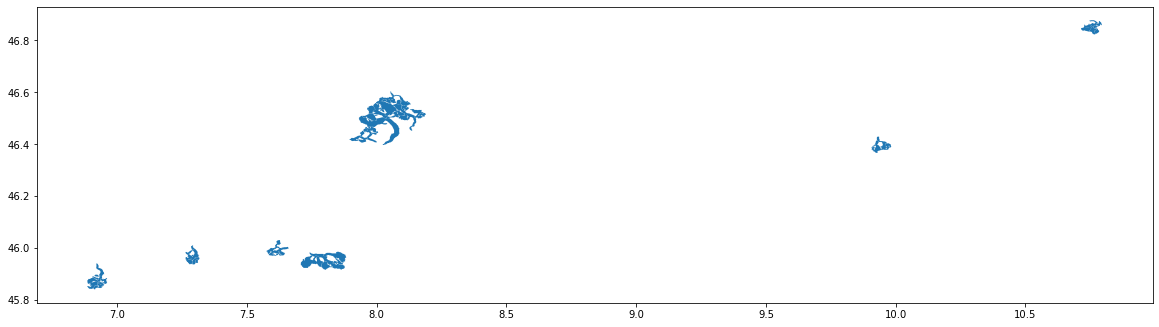

In [27]:
gdfcz.plot(figsize = (20,20))

In [28]:
gdfcz.to_file("glacier_OGGM_output.shp")

In [29]:
def CreateSegmentDataFrame(glacier_list, segDataFrame = pd.DataFrame(), outputGeoDataFrame = True):
    """
    Function to add segment data, from glacier, to an existing or new dataframe.
    The dataframe will contain segment features and catchment features.
    """
    for glacier in glacier_list:
        flowline = glacier.read_pickle('inversion_flowlines') #Centerline object

        dx = abs(glacier.grid.dx) # m
        dy = abs(glacier.grid.dy) # m

        rgi_id = glacier.rgi_id

        for j, ci in enumerate(flowline):
            """
            Loop through the linesegments of the glacier.
            j = flow line index
            ci = centreline
            """

            long_0, lat_0 = ci.line.coords[0]
            t_lon_0, t_lat_0 = glacier.grid.ij_to_crs(long_0, lat_0, crs='EPSG:4326')

            long_1, lat_1 = ci.line.coords[0]
            t_lon_1, t_lat_1 = glacier.grid.ij_to_crs(long_1, lat_1, crs='EPSG:4326')

            for coord in range(0,len(ci.line.coords)):
                """
                loop through the points in the centreline segment.

                At coord, t_lon_0 will be at coord
                """
                if coord < (len(ci.line.coords) - 1):
                    long_2, lat_2 = ci.line.coords[coord+1]
                    t_lon_2, t_lat_2 = glacier.grid.ij_to_crs(long_2, lat_2, crs='EPSG:4326')

                #Add rgi id:
                segDataFrame.loc[rgi_id + str(j) + str(coord), 'RGIid'] = rgi_id

                #Add coord number:
                segDataFrame.loc[rgi_id + str(j) + str(coord), 'segment_no'] = int(coord)

                #Add coords:
                segDataFrame.loc[rgi_id + str(j) + str(coord), 'Longitude'] = t_lon_1
                segDataFrame.loc[rgi_id + str(j) + str(coord), 'Latitude'] = t_lat_1

                #Add widths:
                segDataFrame.loc[rgi_id + str(j) + str(coord), 'width, Y (m)'] = ci.widths[coord]*glacier.grid.dx
                #Add altitudes:
                segDataFrame.loc[rgi_id + str(j) + str(coord), 'altitude (m)'] = ci.surface_h[coord]

                #Add dY and dS:
                if coord == 0:
                    t_lon = np.r_[t_lon_1,t_lon_2]
                    t_lat = np.r_[t_lat_1,t_lat_2]

                    segDataFrame.loc[rgi_id + str(j) + str(coord), 'dY (m)'] = ci.widths[coord + 1]*glacier.grid.dx - ci.widths[coord]*glacier.grid.dx
                    segDataFrame.loc[rgi_id + str(j) + str(coord), 'dS (m)'] = ci.surface_h[coord + 1] - ci.surface_h[coord]


                elif coord == (len(ci.line.coords)-1):
                    t_lon = np.r_[t_lon_0,t_lon_1]
                    t_lat = np.r_[t_lat_0,t_lat_1]

                    segDataFrame.loc[rgi_id + str(j) + str(coord), 'dY (m)'] = ci.widths[coord]*glacier.grid.dx - ci.widths[coord-1]*glacier.grid.dx
                    segDataFrame.loc[rgi_id + str(j) + str(coord), 'dS (m)'] = ci.surface_h[coord] - ci.surface_h[coord-1]

                else:
                    t_lon = np.r_[t_lon_0,t_lon_1,t_lon_2]
                    t_lat = np.r_[t_lat_0,t_lat_1,t_lon_2]

                    segDataFrame.loc[rgi_id + str(j) + str(coord), 'dY (m)'] = ci.widths[coord+1]*glacier.grid.dx - ci.widths[coord-1]*glacier.grid.dx
                    segDataFrame.loc[rgi_id + str(j) + str(coord), 'dS (m)'] = ci.surface_h[coord + 1] - ci.surface_h[coord-1]

                    segDataFrame.loc[rgi_id + str(j) + str(coord), 'curvature'] = comp_curv.fit(t_lon, t_lat)

                #Add normals:
                #(x):
                segDataFrame.loc[rgi_id + str(j) + str(coord), 'normal x'] = ci.normals[coord][0][0]
                #(y):
                segDataFrame.loc[rgi_id + str(j) + str(coord), 'normal y'] = ci.normals[coord][0][1]

                #Update t_lon_0,t_lon_1,t_lat_0,t_lat_1:
                t_lon_0, t_lat_0 = t_lon_1, t_lat_1
                t_lon_1, t_lat_1 = t_lon_2, t_lat_2

                #Add inflow/flow to data:
                #ci.inflow_indices
                #ci.flows_to_indice

                #Add 
    if outputGeoDataFrame == True:
        #create geoDataFrame with pandas df + point geometry
        segGeoDataFrame = gpd.GeoDataFrame(segDataFrame,
                                       geometry=gpd.points_from_xy(segDataFrame.Longitude, segDataFrame.Latitude))
        
    
        print("Outputted geopandas dataframe.")
        return segGeoDataFrame
    
    else:
        print("Outputted pandas dataframe.")
        return segDataFrame

In [30]:
segs = CreateSegmentDataFrame(gdirs)
segs.head()

Outputted geopandas dataframe.


,RGIid,segment_no,Longitude,Latitude,"width, Y (m)",altitude (m),dY (m),dS (m),normal x,normal y,curvature,geometry
RGI60-11.0074600,RGI60-11.00746,0.0,10.786058,46.872835,527.409080,3247.924756,39.854567,-26.857307,-1.0,0.0,NaN,POINT (10.78606 46.87283)
RGI60-11.0074601,RGI60-11.00746,1.0,10.786057,46.871629,567.263647,3221.067450,133.930179,-67.066650,-1.0,0.0,0.00003,POINT (10.78606 46.87163)
RGI60-11.0074602,RGI60-11.00746,2.0,10.786056,46.870423,661.339259,3180.858106,223.058367,-83.767709,-1.0,0.0,0.00003,POINT (10.78606 46.87042)
RGI60-11.0074603,RGI60-11.00746,3.0,10.786056,46.869217,790.322014,3137.299741,274.797290,-83.109129,-1.0,0.0,0.00003,POINT (10.78606 46.86922)
RGI60-11.0074604,RGI60-11.00746,4.0,10.786055,46.868011,936.136550,3097.748977,209.189859,-69.415149,-1.0,0.0,0.00003,POINT (10.78606 46.86801)


In [16]:
segs

,RGIid,segment_no,Longitude,Latitude,"width, Y (m)",altitude (m),dY (m),dS (m),normal x,normal y,curvature,geometry
RGI60-11.0145000,RGI60-11.01450,0.0,8.035825,46.557746,11199.184791,3518.615630,-1208.334746,-52.615804,-1.000000,0.000000,NaN,POINT (8.03582 46.55775)
RGI60-11.0145001,RGI60-11.01450,1.0,8.035824,46.555280,9990.850044,3465.999826,-3869.470769,-115.082455,-1.000000,0.000000,0.000016,POINT (8.03582 46.55528)
RGI60-11.0145002,RGI60-11.01450,2.0,8.035823,46.552814,7329.714022,3403.533175,-4947.116356,-104.573739,-0.998655,0.051841,0.000016,POINT (8.03582 46.55281)
RGI60-11.0145003,RGI60-11.01450,3.0,8.035822,46.550348,5043.733688,3361.426087,-3880.719647,-67.066178,-0.967667,0.252232,0.000018,POINT (8.03582 46.55035)
RGI60-11.0145004,RGI60-11.01450,4.0,8.037289,46.548102,3448.994375,3336.466997,-2399.755184,-45.058727,-0.850312,0.526279,0.028399,POINT (8.03729 46.54810)
...,...,...,...,...,...,...,...,...,...,...,...,...
RGI60-11.00897264,RGI60-11.00897,64.0,10.798172,46.817113,210.423740,2491.445994,-65.955007,-24.009367,0.455624,0.890173,0.051404,POINT (10.79817 46.81711)
RGI60-11.00897265,RGI60-11.00897,65.0,10.799315,46.817553,179.355657,2480.895007,-55.999585,-19.047184,0.423015,0.906123,0.051832,POINT (10.79931 46.81755)
RGI60-11.00897266,RGI60-11.00897,66.0,10.800552,46.817846,154.424155,2472.398810,-45.912242,-17.960019,0.421611,0.906777,0.054032,POINT (10.80055 46.81785)
RGI60-11.00897267,RGI60-11.00897,67.0,10.801747,46.818215,133.443416,2462.934987,-32.847490,-18.033309,0.533879,0.845561,0.053056,POINT (10.80175 46.81822)


<AxesSubplot:>

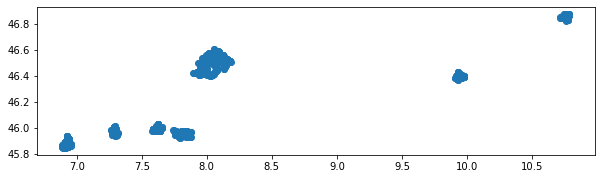

In [31]:
segs.plot(figsize=(10,10))

In [32]:
segs.to_file("OGGM_output_segment_points.shp")

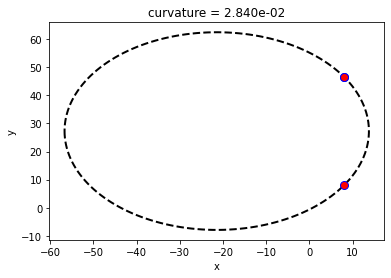

In [23]:
#Curve Example
# Apply code for an example
#[8.03582249 8.03728949 8.03981605] [46.55034815 46.54810239  8.03981605]
x = np.r_[8.03582249, 8.03728949, 8.03981605]
y = np.r_[46.55034815, 46.54810239,  8.03981605]
comp_curv = ComputeCurvature()
curvature = comp_curv.fit(x, y)

# Plot the result
theta_fit = np.linspace(-np.pi, np.pi, 180)
x_fit = comp_curv.xc + comp_curv.r*np.cos(theta_fit)
y_fit = comp_curv.yc + comp_curv.r*np.sin(theta_fit)
plt.plot(x_fit, y_fit, 'k--', label='fit', lw=2)
plt.plot(x, y, 'ro', label='data', ms=8, mec='b', mew=1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('curvature = {:.3e}'.format(curvature))
plt.show()